In [369]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [370]:
# importing data from csv file and fixing the tab separator
dt = pd.read_csv('customer_analysis.csv', sep='\t')
dt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [371]:
# read all null columns
dt.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [372]:
# delete ID column  
dt = dt.drop(['ID'], axis=1)

In [373]:
# delete the row that has has the null values
dt = dt.dropna()

In [374]:
# le = LabelEncoder()
# dt['Education'] = le.fit_transform(dt['Education'])
# dt['Marital_Status'] = le.fit_transform(dt['Marital_Status'])

In [375]:
dt.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [376]:
dt['Dt_Customer'] = pd.to_datetime(dt['Dt_Customer'], format='%d-%m-%Y')

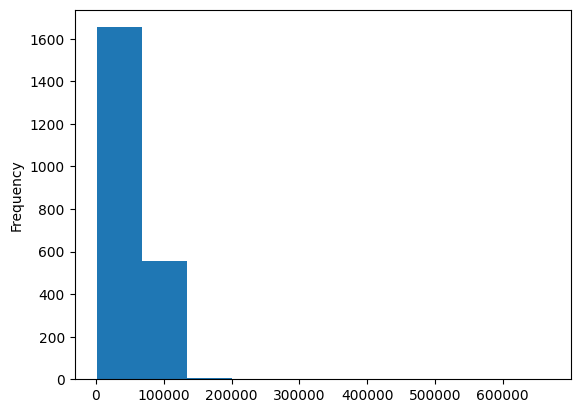

In [377]:
dt['Income'].plot(kind='hist')
plt.show()

In [378]:
Q1 = dt['Income'].quantile(0.25)
Q3 = dt['Income'].quantile(0.75)
IQR = Q3 - Q1


dt = dt[~((dt['Income'] < (Q1 - 1.5 * IQR)) |(dt['Income'] > (Q3 + 1.5 * IQR)))]
dt['Income'].describe()

count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64

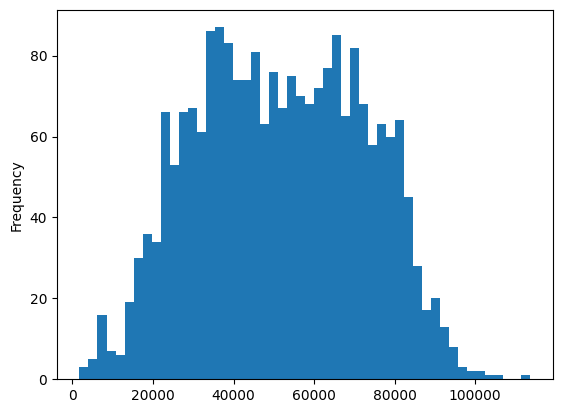

In [379]:
dt['Income'].plot(kind='hist', bins=50)
plt.show()

In [380]:
dt['isParent'] = (dt['Kidhome'] + dt['Teenhome']).apply(lambda x: 1 if x > 0 else 0)

In [381]:
dt['TotalChildren'] = dt['Kidhome'] + dt['Teenhome']

In [382]:
dt['Spent'] = dt['MntWines'] + dt['MntFruits'] + dt['MntMeatProducts'] + dt['MntFishProducts'] + dt['MntSweetProducts'] + dt['MntGoldProds']

In [383]:
dt['Age'] = 2023 - dt['Year_Birth']
# Drop the Year_Birth column after adding age
dt.drop('Year_Birth', axis=1, inplace=True)

In [384]:
le = LabelEncoder()
dt['Marital_Status'] = le.fit_transform(dt['Marital_Status'])

In [385]:
# make "familySize" column, which is the sum of "TotalChildren" and "Marital Status", Married and Together are considered as 2, and the rest are 1
dt['familySize'] = dt['TotalChildren'] + dt['Marital_Status'].apply(lambda x: 2 if x == 'Married' or x == 'Together' else 1)

In [386]:
# extract the date, month, and year from the "Dt_Customer" column make 3 new columns with these values
dt['EnrollMonth'] = dt['Dt_Customer'].dt.month
dt['EnrollDay'] = dt['Dt_Customer'].dt.day
dt['EnrollYear'] = dt['Dt_Customer'].dt.year


In [387]:
# encode "Education" columns into 3 distinct values (from "Graduation", "PhD", "Master", "2n Cycle", "Basic") into only 3 values (0, 1, 2)
dt['Education'] = dt['Education'].apply(lambda x: 0 if x == 'Graduation' else 1 if x == 'PhD' else 2)

In [388]:
dt["Education"].value_counts()


Education
0    1113
2     618
1     477
Name: count, dtype: int64

In [389]:
# delete the "Dt_Customer" column
dt.drop('Dt_Customer', axis=1, inplace=True)

In [390]:
sc = StandardScaler()
sc.fit(dt)
s_dt = pd.DataFrame(sc.transform(dt), columns=dt.columns)

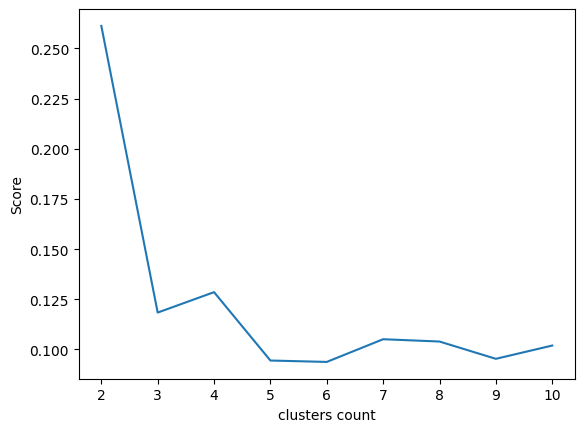

In [391]:
silhouette_scores = []
clusters_range = range(2, 11)
for i in clusters_range: 
    model = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    labels = model.fit_predict(s_dt)
    silhouette_scores.append(silhouette_score(s_dt, labels))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('clusters count')
plt.ylabel('Score')
plt.show()

In [392]:
knl = KneeLocator(clusters_range, silhouette_scores, curve='convex', direction='decreasing')
print(knl.elbow)

3


In [393]:
agg_c = AgglomerativeClustering(n_clusters=knl.elbow, metric='euclidean', linkage='ward')
cluster = agg_c.fit_predict(s_dt)
dt['Cluster'] = cluster
dt.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,isParent,TotalChildren,Spent,Age,familySize,EnrollMonth,EnrollDay,EnrollYear,Cluster
0,0,4,58138.0,0,0,58,635,88,546,172,...,1,0,0,1617,66,1,9,4,2012,0
1,0,4,46344.0,1,1,38,11,1,6,2,...,0,1,2,27,69,3,3,8,2014,1
2,0,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,776,58,1,8,21,2013,0
3,0,5,26646.0,1,0,26,11,4,20,10,...,0,1,1,53,39,2,2,10,2014,1
4,1,3,58293.0,1,0,94,173,43,118,46,...,0,1,1,422,42,2,1,19,2014,2


In [394]:
dt.groupby('Cluster').agg(count=('Cluster', 'count'), 
                          Income=('Income', 'mean'),
                          MntWines=('MntWines', 'mean'),
                          MntFruits=('MntFruits', 'mean'),
                          MntMeatProducts=('MntMeatProducts', 'mean'),
                          MntFishProducts=('MntFishProducts', 'mean'),
                          NumDealsPurchases=('NumDealsPurchases', 'mean'),
                          NumWebPurchases=('NumWebPurchases', 'mean'),
                          NumCatalogPurchases=('NumCatalogPurchases', 'mean'),
                          NumStorePurchases=('NumStorePurchases', 'mean'),
                          NumWebVisitsMonth=('NumWebVisitsMonth', 'mean'),
                          Age=('Age', 'mean'),
                          TotalSpent=('Spent', 'mean'), 
                          isParent=('isParent', 'mean'),
                          TotalChildren=('TotalChildren', 'mean'),
                          FamilySize=('familySize', 'mean'),
                          EnrollYear=('EnrollYear', 'mean'),
                          )

,count,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,TotalSpent,isParent,TotalChildren,FamilySize,EnrollYear
Cluster,,,,,,,,,,,,,,,,,
0,481,76569.135135,643.642412,62.357588,467.893971,92.721414,1.145530,4.825364,5.893971,8.291060,2.698545,54.746362,1405.665281,0.087318,0.101871,1.101871,2013.041580
1,1222,38139.634206,107.985270,8.910802,49.375614,13.250409,2.506547,2.931260,1.035188,3.874795,6.451718,52.454173,213.442717,0.855974,1.239771,2.239771,2013.058920
2,505,60536.011881,464.001980,34.625743,157.809901,44.712871,2.972277,6.229703,3.445545,8.170297,5.140594,57.873267,798.079208,0.972277,1.049505,2.049505,2012.940594


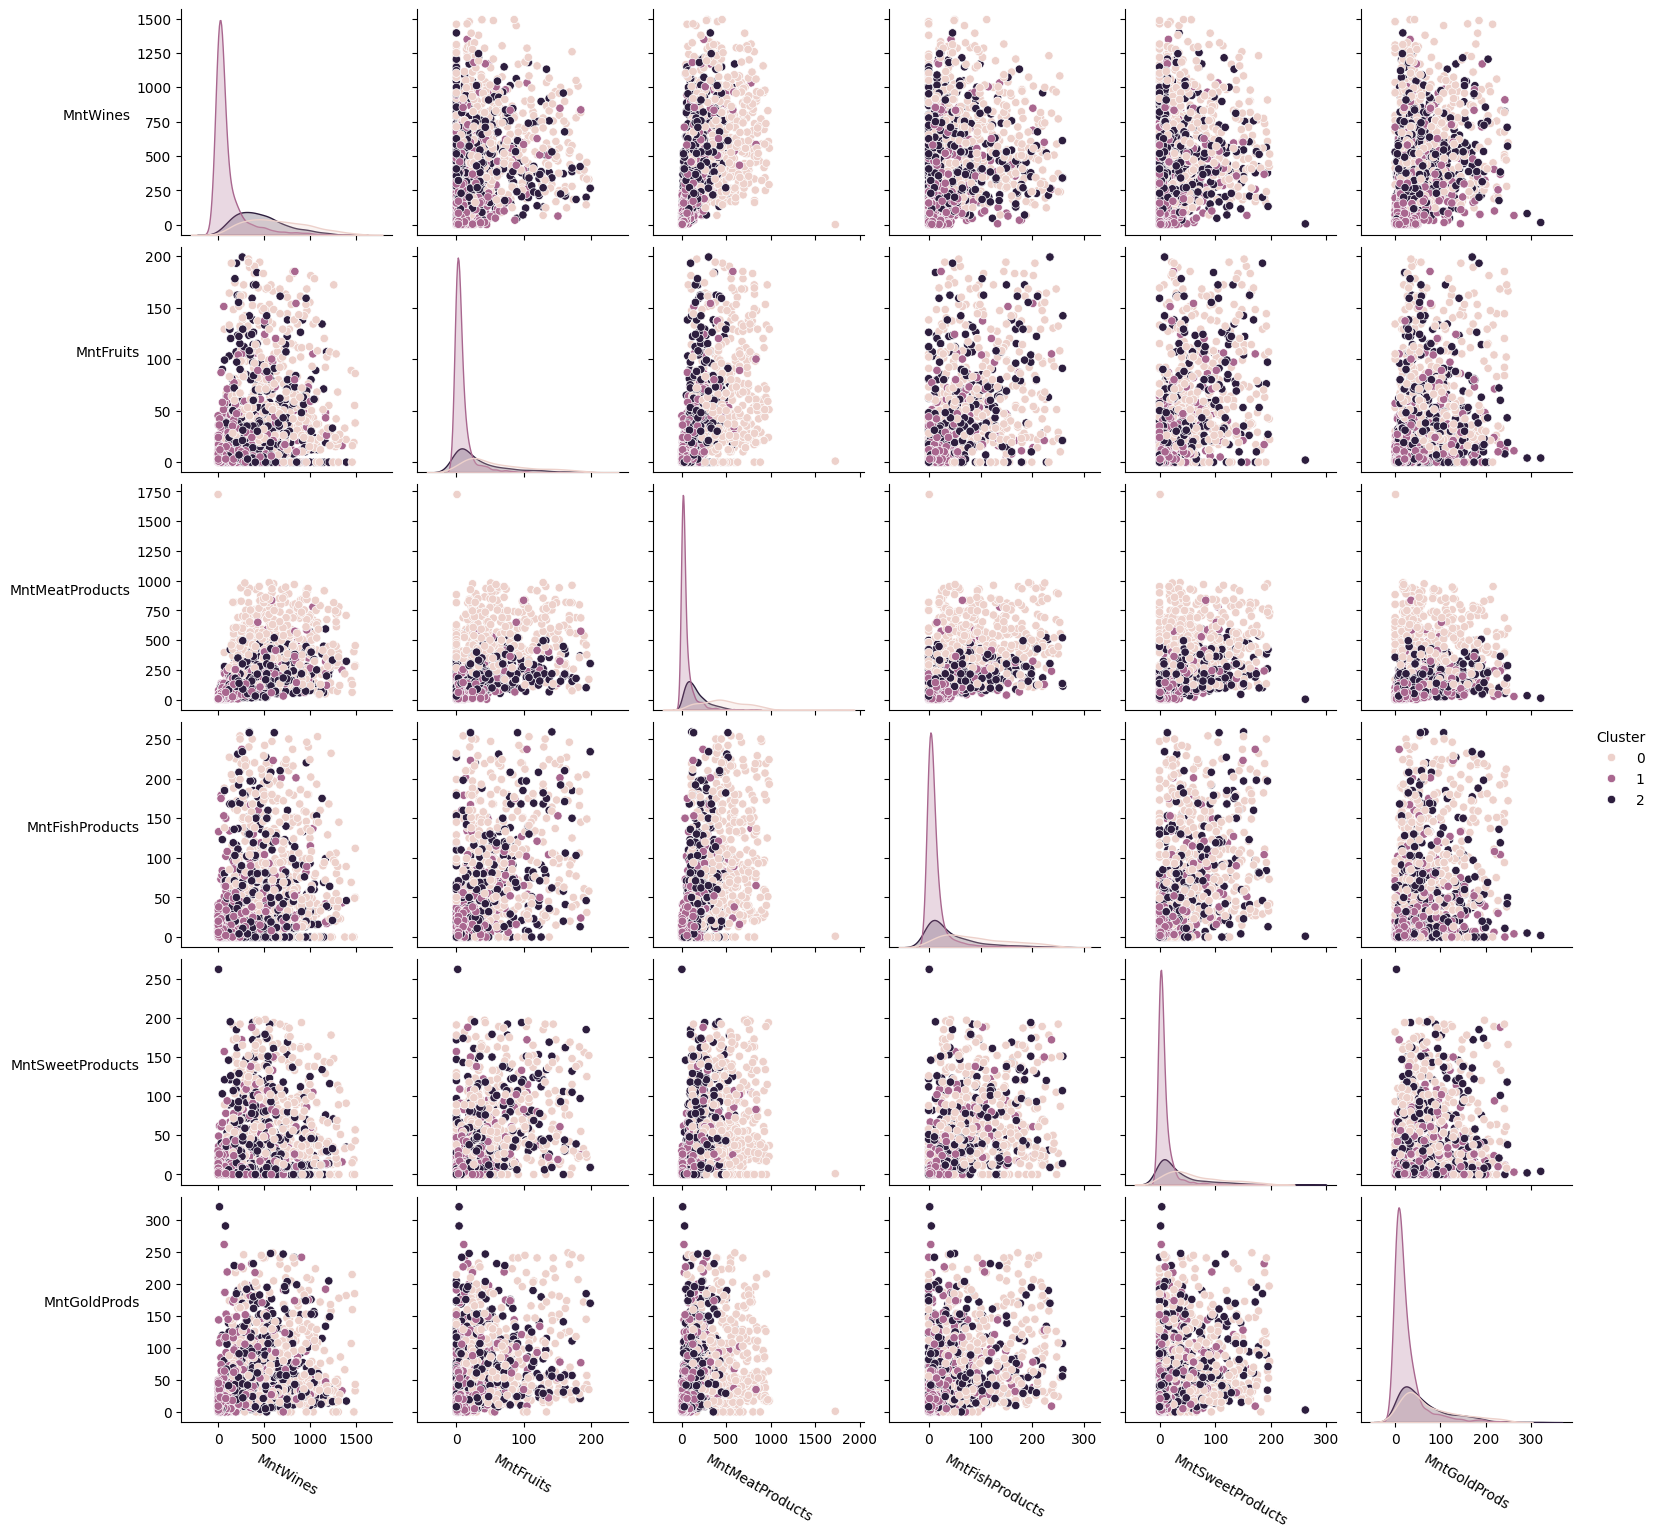

In [395]:
target_attributes = dt[['Cluster', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
g = sns.pairplot(target_attributes, hue='Cluster')
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

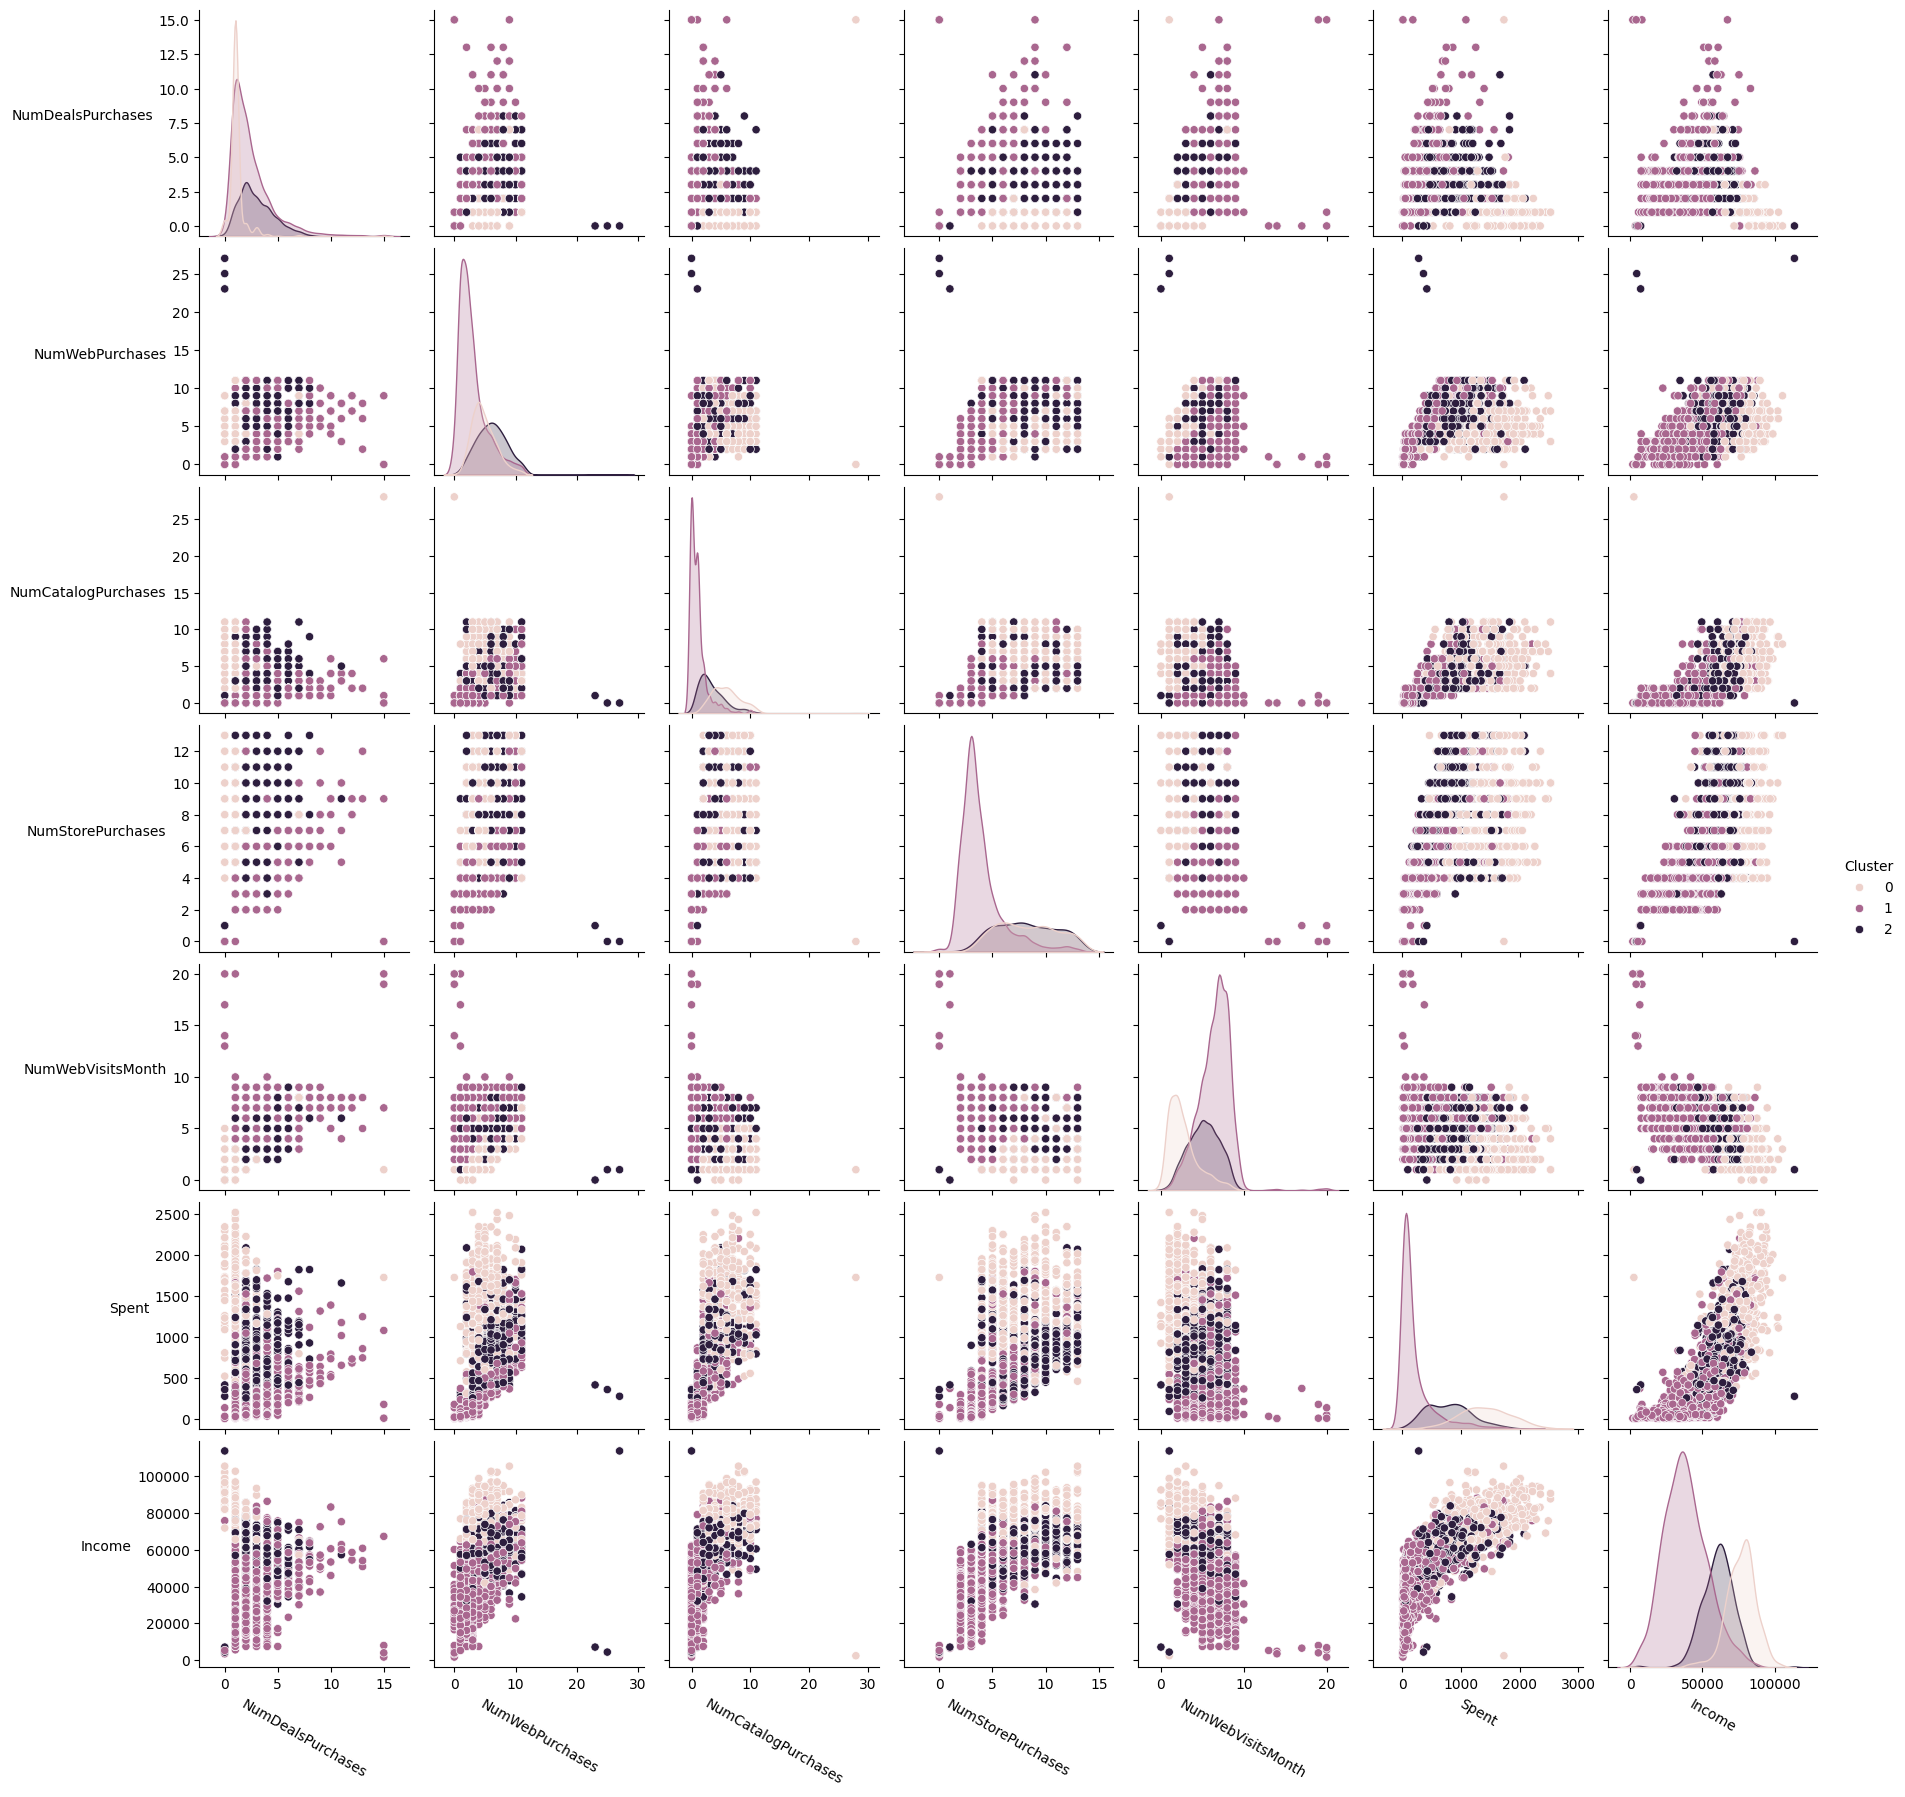

In [396]:
target_attributes = dt[['Cluster', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Spent', 'Income']]
g = sns.pairplot(target_attributes, hue='Cluster')
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

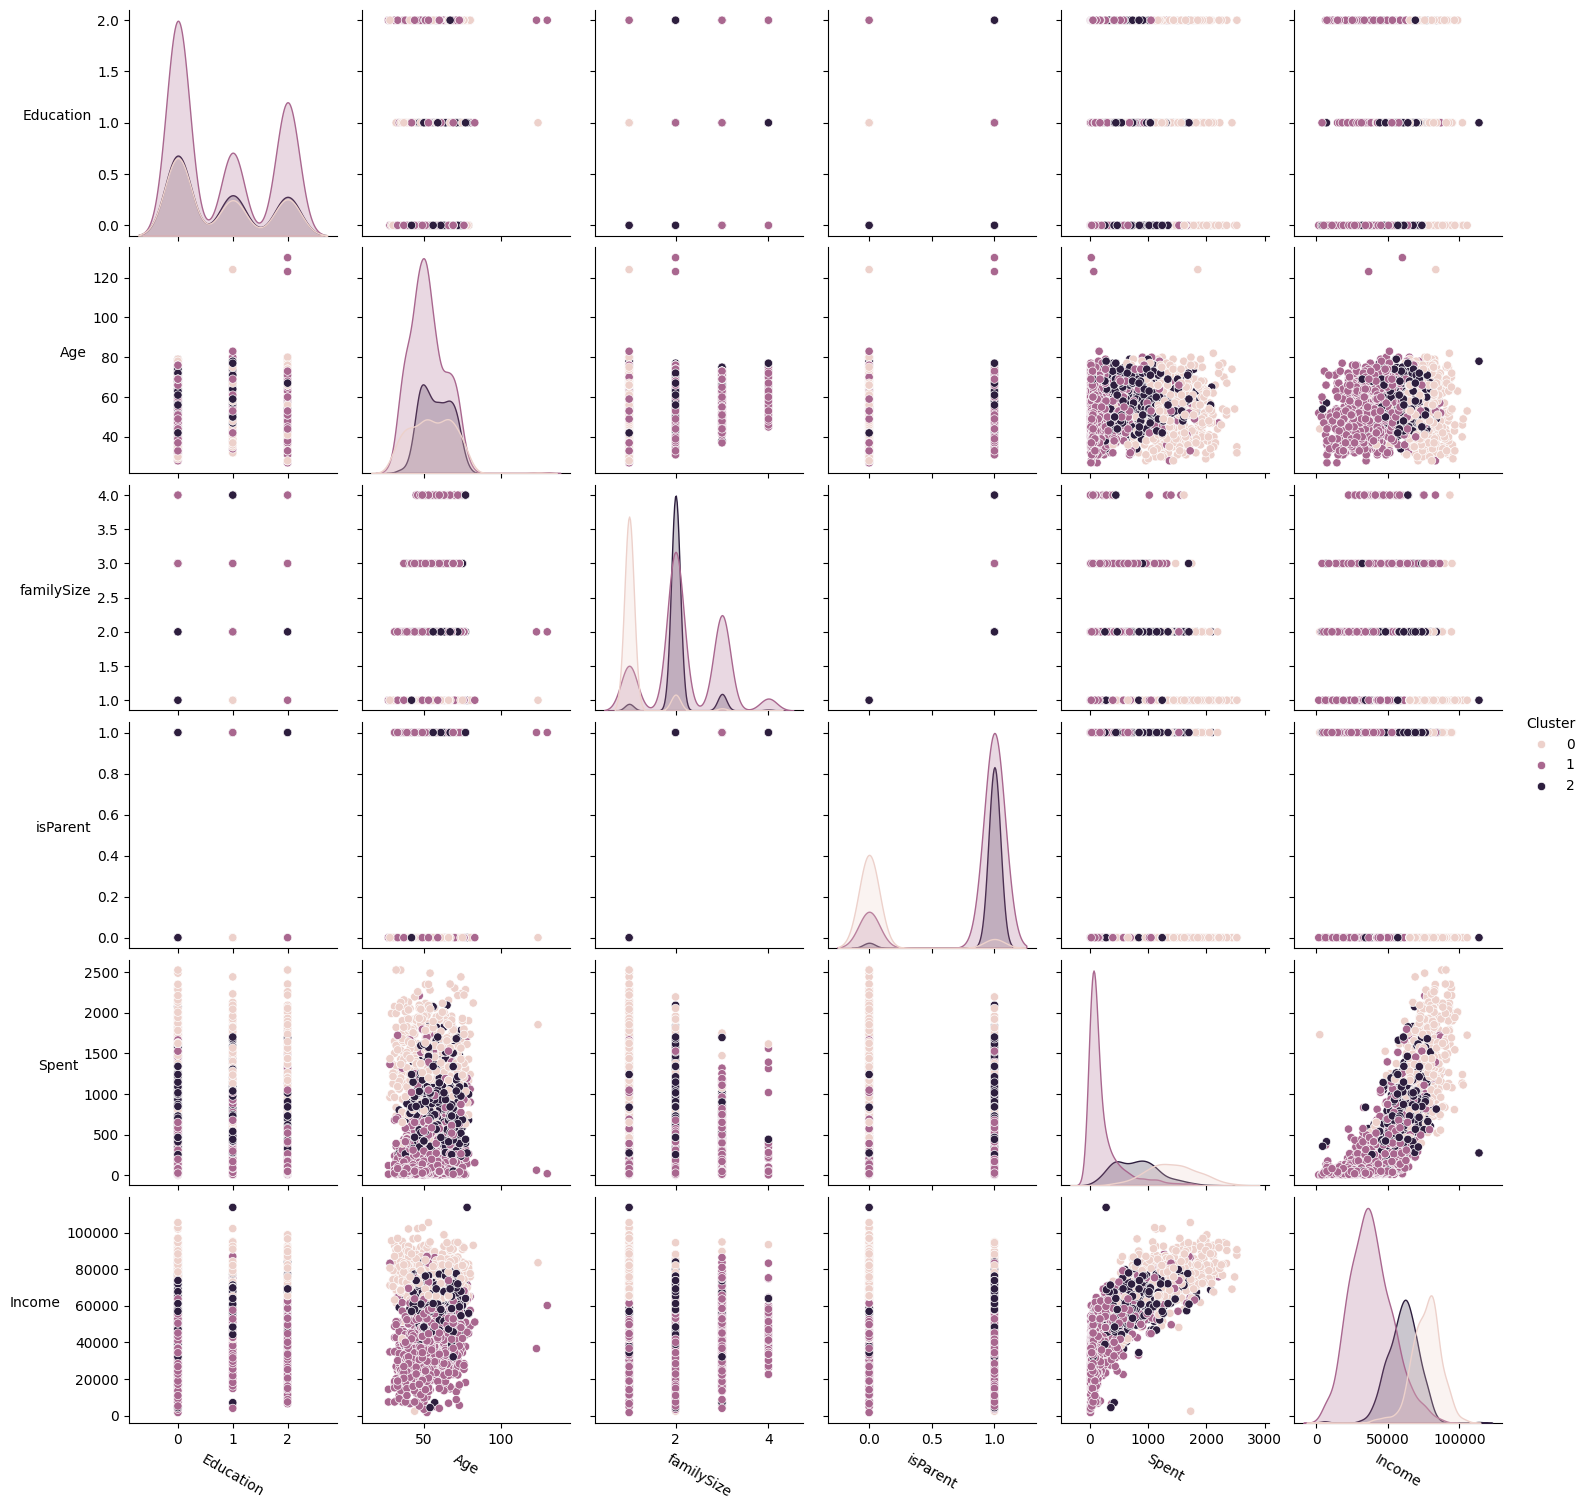

In [397]:
target_attributes = dt[['Cluster', 'Education', 'Age', 'familySize', 'isParent', 'Spent', 'Income']]
g = sns.pairplot(target_attributes, hue='Cluster')
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

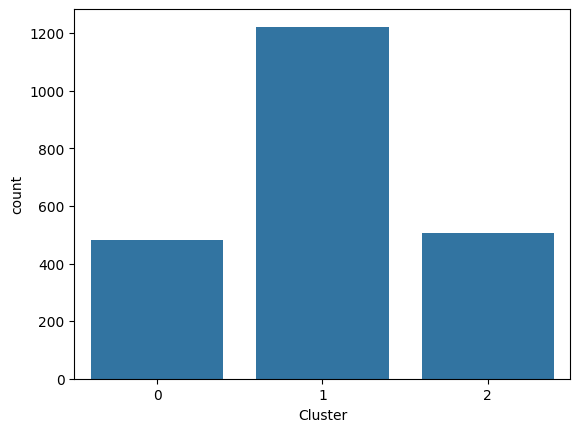

In [398]:
sns.countplot(x='Cluster', data=dt)
plt.show()

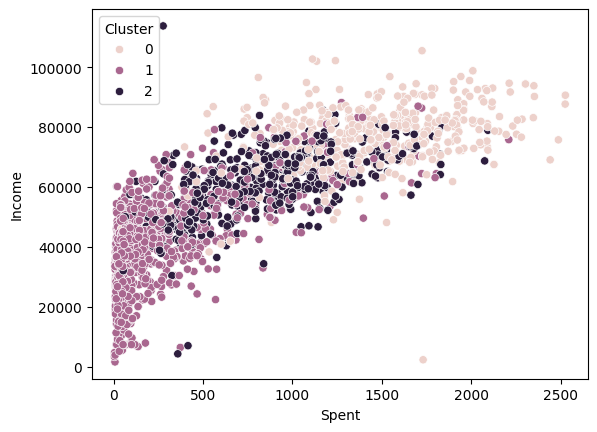

In [399]:
sns.scatterplot(x='Spent', y='Income', hue='Cluster', data=dt)
plt.show()

# Conclusion

There are three clusters, clustef 1,2 and 3. From the scatterplot, it seems that cluster 1 subsequently followed by 2 and 0 in terms of Spent. In Conclusion, the higher the Income, the higher the Spent rates. From the countplot, cluster 1 has the highest population followed by cluster 2 and 0
